In [ ]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from google.colab import drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
# Constants
IMAGE_HEIGHT, IMAGE_WIDTH = 64, 64
SEQUENCE_LENGTH = 50
DATASET_DIR = '/content/drive/My Drive/DatasetDeepfake'
CLASSES_LIST = ['Deepfake', 'Original']
seed_constant = 27

In [ ]:
subfolders = os.listdir(DATASET_DIR)
print(f"Subfolders in dataset: {subfolders}")

Subfolders in dataset: ['Original', 'Deepfake']


In [ ]:
for subfolder in subfolders:
    subfolder_path = os.path.join(DATASET_DIR, subfolder)
    if os.path.isdir(subfolder_path):
        files = os.listdir(subfolder_path)
        print(f"Subfolder '{subfolder}' has {len(files)} files.")

Subfolder 'Original' has 85 files.
Subfolder 'Deepfake' has 85 files.


In [ ]:
videos_per_folder = 85
video_paths = []

for subfolder in CLASSES_LIST:
    folder_path = os.path.join(DATASET_DIR, subfolder)
    if not os.path.exists(folder_path):
        print(f"Folder '{subfolder}' does not exist. Skipping...")
        continue

    video_files = os.listdir(folder_path)
    if not video_files:
        print(f"No videos found in '{subfolder}'. Skipping...")
        continue

    selected_videos = random.sample(video_files, min(videos_per_folder, len(video_files)))

    for video in selected_videos:
        video_paths.append((subfolder, video))

print(f"Total videos selected: {len(video_paths)} (Expected: {videos_per_folder * len(CLASSES_LIST)})")


Total videos selected: 170 (Expected: 170)


In [ ]:

def frames_extraction(video_path):
    frames_list = []
    video_reader = cv2.VideoCapture(video_path)
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    skip_frames_window = max(int(video_frames_count / SEQUENCE_LENGTH), 1)

    for frame_counter in range(SEQUENCE_LENGTH):
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)
        success, frame = video_reader.read()
        if not success:
            break
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        normalized_frame = resized_frame / 255.0
        frames_list.append(normalized_frame)

    video_reader.release()
    return frames_list

In [ ]:
@tf.function  # <- Compiles the function into a TensorFlow graph for GPU
def create_dataset():
    features = []
    labels = []
    video_files_paths = []

    for class_index, class_name in enumerate(CLASSES_LIST):
        print(f'Extracting Data of Class: {class_name}')
        files_list = os.listdir(os.path.join(DATASET_DIR, class_name))

        for file_name in files_list:
            video_file_path = os.path.join(DATASET_DIR, class_name, file_name)
            frames = frames_extraction(video_file_path)

            if len(frames) == SEQUENCE_LENGTH:
                features.append(frames)
                labels.append(class_index)
                video_files_paths.append(video_file_path)

    features = np.asarray(features, dtype=np.float32)
    labels = np.array(labels)
    return features, labels, video_files_paths

# Actually Create the Dataset
features, labels, video_files_paths = create_dataset()


Extracting Data of Class: Deepfake
Extracting Data of Class: Original


In [ ]:
print(f"Features shape: {np.shape(features)}")
print(f"Labels shape: {np.shape(labels)}")
print(f"Sample labels: {labels[:5]}")

Features shape: (168, 50, 64, 64, 3)
Labels shape: (168,)
Sample labels: [0 0 0 0 0]


In [ ]:
if labels is None or len(labels) == 0:
    raise ValueError("No labels found. Check if your dataset path and video processing are correct.")


In [ ]:
np.save('/content/features.npy', features)
np.save('/content/labels.npy', labels)
np.save('/content/video_file_paths.npy', video_files_paths)
print("Saved features, labels, video_file_paths")


Saved features, labels, video_file_paths ✅


In [ ]:
# Load saved data
features = np.load('/content/features.npy')
labels = np.load('/content/labels.npy')
video_files_paths = np.load('/content/video_file_paths.npy', allow_pickle=True)

print("Loaded saved features, labels, video_file_paths ")


Loaded saved features, labels, video_file_paths ✅


In [ ]:

print(features.shape, labels.shape)

(168, 50, 64, 64, 3) (168,)


In [ ]:
one_hot_encoded_labels = to_categorical(labels)

In [ ]:
one_hot_encoded_labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [ ]:

features_train, features_test, labels_train, labels_test = train_test_split(
    features,
    one_hot_encoded_labels,
    test_size=0.2,
    shuffle=True,
    random_state=seed_constant
)

print(f"Training set size: {features_train.shape}")
print(f"Testing set size: {features_test.shape}")


Training set size: (134, 50, 64, 64, 3)
Testing set size: (34, 50, 64, 64, 3)


In [ ]:
!pip install keras-tuner --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.3 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [ ]:

# Your features and labels should already be created!
# features_train, features_test, labels_train, labels_test

# Define image/video input shape
input_shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)  # (frames, height, width, channels)
num_classes = len(CLASSES_LIST)

In [ ]:
def build_model(hp):
    model = Sequential()

    # First Conv3D block
    conv1_kernel_size = hp.Choice('conv_1_kernel_size', [3, 5])
    model.add(Conv3D(
        filters=hp.Choice('conv_1_filters', [16, 32, 64]),
        kernel_size=(conv1_kernel_size, conv1_kernel_size, conv1_kernel_size),
        activation='relu',
        input_shape=(50, 64, 64, 3)
    ))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))

    # Second Conv3D block
    conv2_kernel_size = hp.Choice('conv_2_kernel_size', [3, 5])
    model.add(Conv3D(
        filters=hp.Choice('conv_2_filters', [32, 64, 128]),
        kernel_size=(conv2_kernel_size, conv2_kernel_size, conv2_kernel_size),
        activation='relu'
    ))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))

    model.add(Flatten())

    # Dense layer
    model.add(Dense(
        units=hp.Int('dense_units', min_value=64, max_value=256, step=64),
        activation='relu'
    ))
    model.add(Dropout(
        rate=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)
    ))

    model.add(Dense(2, activation='softmax'))  # 2 classes

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
        ),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [ ]:
# Initialize the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_results',
    project_name='deepfake_detection'
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Summary of search space
tuner.search_space_summary()

Search space summary
Default search space size: 7
conv_1_kernel_size (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
conv_1_filters (Choice)
{'default': 16, 'conditions': [], 'values': [16, 32, 64], 'ordered': True}
conv_2_kernel_size (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
conv_2_filters (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64, 128], 'ordered': True}
dense_units (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 64, 'sampling': 'linear'}
dropout_rate (Float)
{'default': 0.2, 'conditions': [], 'min_value': 0.2, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
# # Start search
# tuner.search(
#     features_train, labels_train,
#     epochs=10,
#     validation_data=(features_test, labels_test),
#     batch_size=16,   # <-- just a fixed value here (like 8, 16, 32)
#     callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)],
#     verbose=2
# )
# Start hyperparameter search (without EarlyStopping)
# Instead of using hp.Int here, directly fix batch_size for search
tuner.search(
    features_train, labels_train,
    epochs=10,
    validation_data=(features_test, labels_test),
    batch_size=16,
    verbose=2
)



In [ ]:
# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# Evaluate the best model
loss, accuracy = best_model.evaluate(features_test, labels_test)
print(f'Best model accuracy: {accuracy * 100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 354ms/step - accuracy: 0.8199 - loss: 0.9084
Best model accuracy: 82.35%


In [ ]:
# Save the best model
best_model.save('best_deepfake_detection_model.h5')

In [ ]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best hyperparameters found:")
for param_name in best_hps.values.keys():
    print(f"{param_name}: {best_hps.get(param_name)}")


Best hyperparameters found:
conv_1_kernel_size: 3
conv_1_filters: 16
conv_2_kernel_size: 3
conv_2_filters: 64
dense_units: 256
dropout_rate: 0.2
learning_rate: 0.001


**Traning model**

In [ ]:
import datetime as dt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout
# from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [ ]:
# Best hyperparameters from tuning
conv_1_filters = 16
conv_1_kernel_size = (3, 3, 3)
conv_2_filters = 64
conv_2_kernel_size = (3, 3, 3)
dense_units = 256
dropout_rate = 0.2
learning_rate = 0.001

In [ ]:
# Create Conv3D model
def create_conv3d_model():
    model = Sequential()

    # First Conv3D layer
    model.add(Conv3D(filters=conv_1_filters, kernel_size=conv_1_kernel_size, activation='relu',
                     input_shape=(SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same'))
    model.add(Dropout(dropout_rate))

    # Second Conv3D layer
    model.add(Conv3D(filters=conv_2_filters, kernel_size=conv_2_kernel_size, activation='relu'))
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same'))
    model.add(Dropout(dropout_rate))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(len(CLASSES_LIST), activation='softmax'))

    model.summary()
    return model

In [ ]:
# Instantiate the model
conv3d_model = create_conv3d_model()
print("Conv3D Model Created Successfully")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d_2 (Conv3D)               │ (None, 48, 62, 62, 16) │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_2 (MaxPooling3D)  │ (None, 48, 31, 31, 16) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 48, 31, 31, 16) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_3 (Conv3D)               │ (None, 46, 29, 29, 64) │        27,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_3 (MaxPooling3D)  │ (None, 46, 15, 15, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 46, 15, 15, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 662400)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │   169,574,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169,604,194 (646.99 MB)

 Trainable params: 169,604,194 (646.99 MB)

 Non-trainable params: 0 (0.00 B)

Conv3D Model Created Successfully


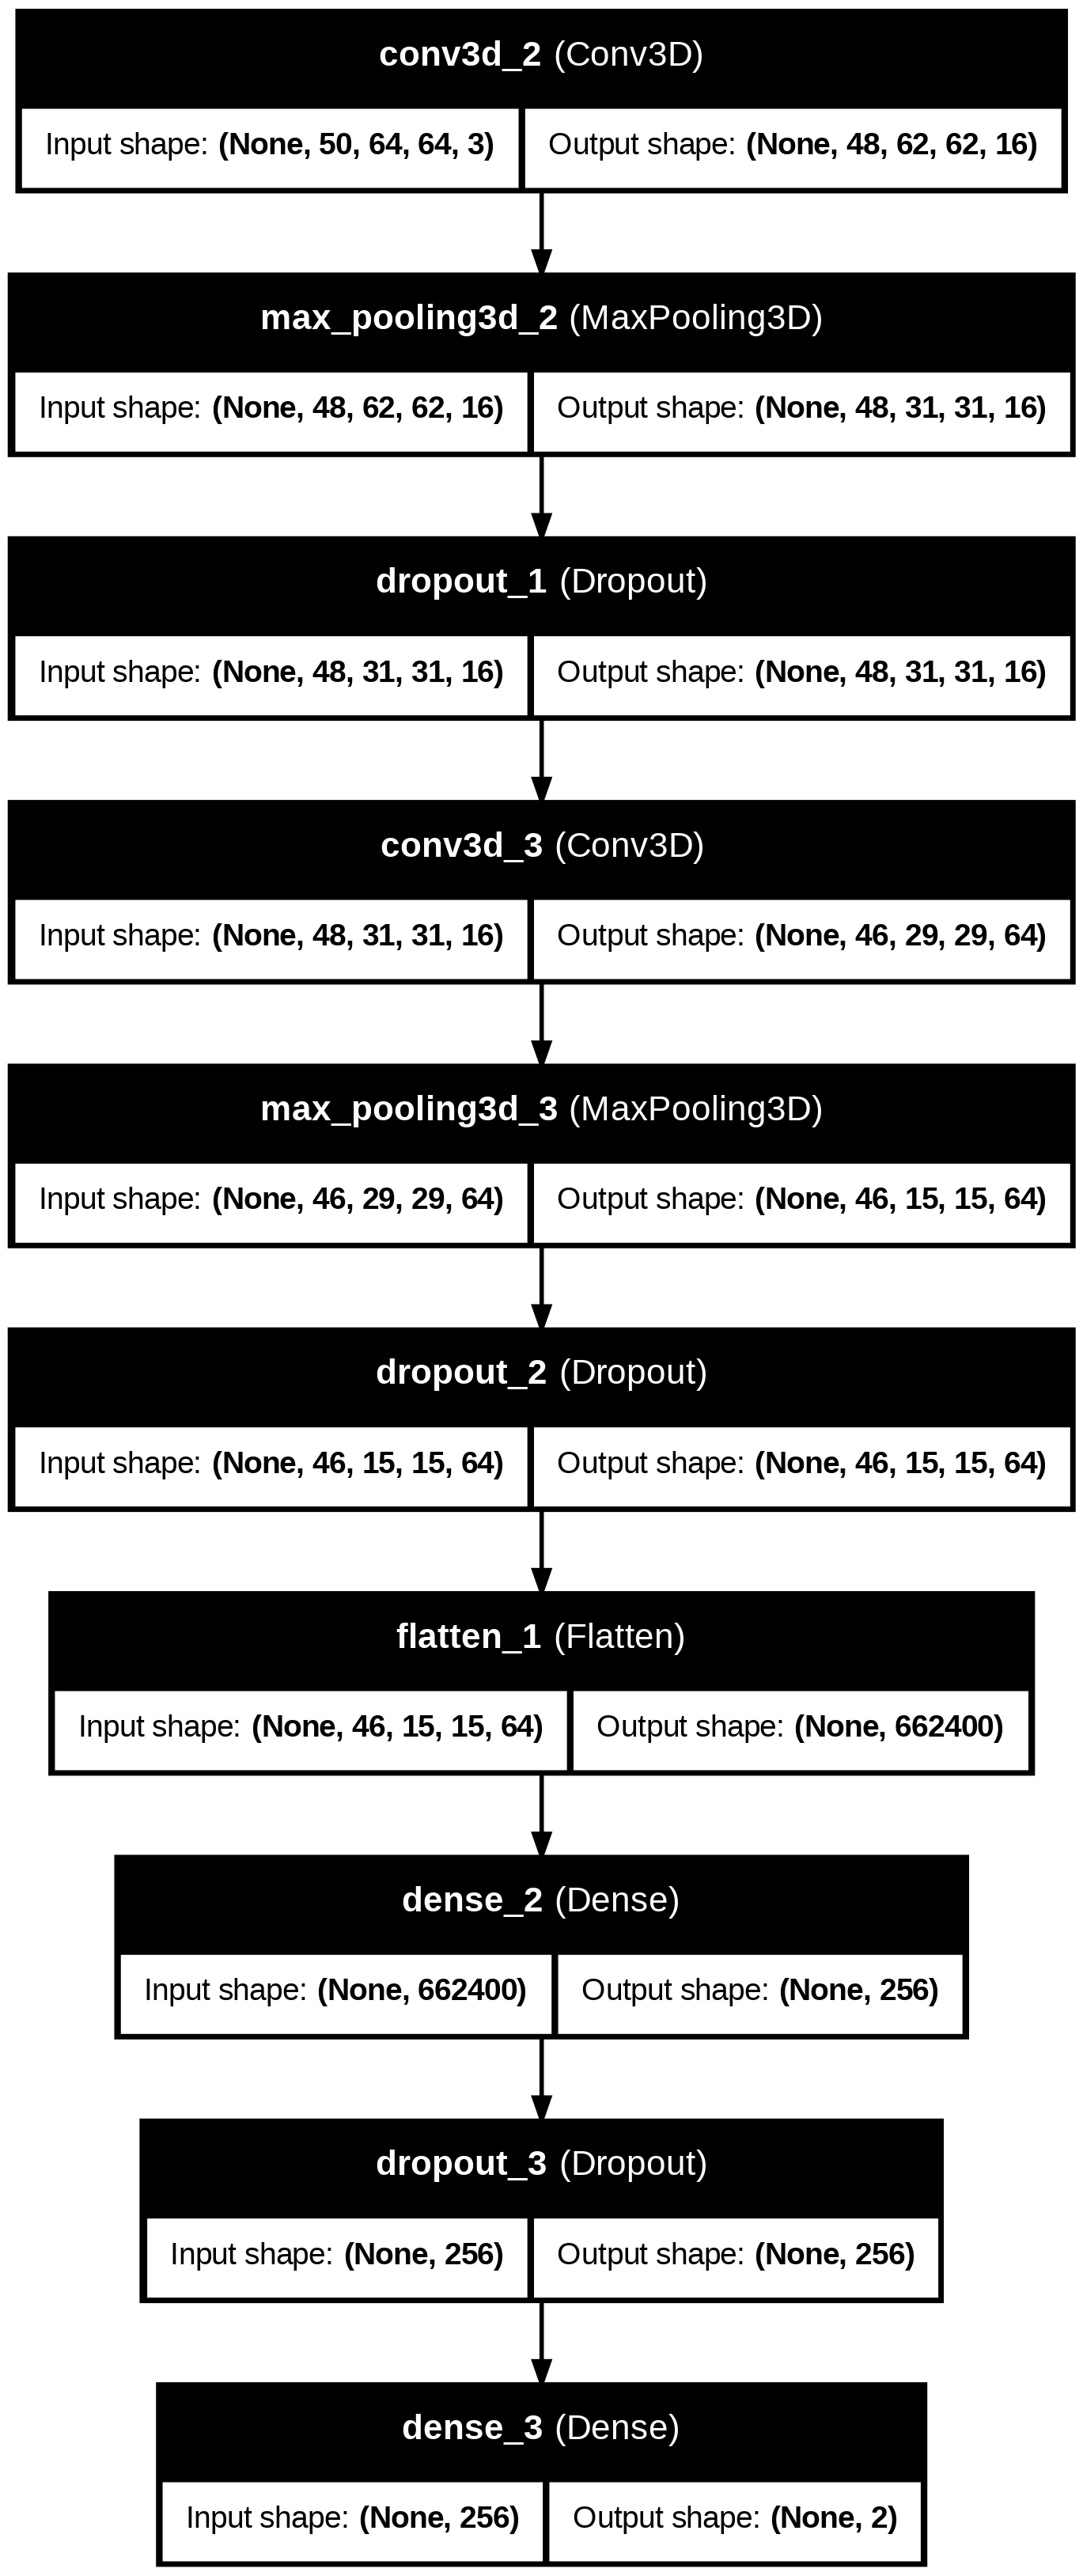

In [ ]:
# Plot model architecture
plot_model(conv3d_model, to_file='conv3d_model_structure_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# # Early stopping
# early_stopping_callback = EarlyStopping(
#     monitor='val_loss',
#     patience=10,
#     verbose=1,
#     mode='min',
#     restore_best_weights=True
# )

In [ ]:
# Compile model
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
conv3d_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
# Train the model
conv3d_model_training_history = conv3d_model.fit(
    x=features_train,
    y=labels_train,
    epochs=50,
    batch_size=16,
    shuffle=True,
    validation_split=0.2,
)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5401 - loss: 44.7915 - val_accuracy: 0.6296 - val_loss: 1.5118
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step - accuracy: 0.5791 - loss: 2.0392 - val_accuracy: 0.6667 - val_loss: 0.6399
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.8419 - loss: 0.5044 - val_accuracy: 0.6667 - val_loss: 0.7875
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.5862 - loss: 0.7801 - val_accuracy: 0.7037 - val_loss: 0.8216
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - accuracy: 0.8576 - loss: 0.3109 - val_accuracy: 0.6296 - val_loss: 0.8498
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.8919 - loss: 0.2680 - val_accuracy: 0.6296 - val_loss: 1.0612
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.9186 - loss: 0.2324 - val_accuracy: 0.6296 - val_loss: 1.1865
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.8619 - loss: 0.2474 - val_accuracy: 0.6296 - val_loss: 

In [ ]:
# Evaluate the model
model_evaluation_loss, model_evaluation_accuracy = conv3d_model.evaluate(features_test, labels_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.8002 - loss: 0.9967


In [ ]:
# Save the model
date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)

model_file_name = f'conv3d_model_Date_Time_{current_date_time_string}__Loss_{model_evaluation_loss:.4f}__Accuracy_{model_evaluation_accuracy:.4f}.h5'
conv3d_model.save(model_file_name)

print(f"Model saved as {model_file_name}")

Model saved as conv3d_model_Date_Time_2025_04_27__13_28_52__Loss_1.0194__Accuracy_0.7941.h5


In [ ]:
import numpy as np
import cv2
import tensorflow as tf

# ----------------------
# Set your parameters
# ----------------------
IMAGE_HEIGHT, IMAGE_WIDTH = 64, 64
SEQUENCE_LENGTH = 50    # Match what you want to use (or 50 if that's your SEQUENCE_LENGTH)
CLASSES_LIST = ['Deepfake', 'Original']
MODEL_PATH = '/content/conv3d_model_Date_Time_2025_04_27__13_28_52__Loss_1.0194__Accuracy_0.7941.h5'  # <-- Your model

In [ ]:
# ----------------------
# Load trained model
# ----------------------
model = tf.keras.models.load_model(MODEL_PATH)
print("Model loaded successfully!")

Model loaded successfully!


In [ ]:
def preprocess_video(video_path):
    frames_list = []
    video_reader = cv2.VideoCapture(video_path)
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    skip_frames_window = max(int(video_frames_count / SEQUENCE_LENGTH), 1)

    for frame_counter in range(SEQUENCE_LENGTH):
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)
        success, frame = video_reader.read()
        if not success:
            break
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        normalized_frame = resized_frame / 255.0
        frames_list.append(normalized_frame)

    video_reader.release()

    if len(frames_list) == SEQUENCE_LENGTH:
        return np.array(frames_list)
    else:
        print(f"Warning: Only {len(frames_list)} frames extracted. Expected {SEQUENCE_LENGTH}.")
        return None

# ----------------------
# Function to predict
# ----------------------
def predict_video(video_path):
    frames = preprocess_video(video_path)

    if frames is None:
        print("Not enough frames to predict.")
        return

    input_data = np.expand_dims(frames, axis=0)  # (1, 30, 64, 64, 3)
    prediction = model.predict(input_data)
    predicted_label_index = np.argmax(prediction)
    predicted_class_name = CLASSES_LIST[predicted_label_index]

    print(f"Prediction: {predicted_class_name} ({prediction[0][predicted_label_index]*100:.2f}% confidence)")


In [ ]:
video_file_path = '/content/01_14__outside_talking_still_laughing__01YF7VQM.mp4'  # Change this
predict_video(video_file_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction: Deepfake (99.98% confidence)
